In [30]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import load_img, img_to_array
tf.compat.v1.disable_eager_execution()

import matplotlib.pyplot as plt

In [33]:
model = load_model('/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.20 미니프로젝트 3차 (1)/checkpoints/InceptionV3_GAP_BN/save_model.h5')

Instructions for updating:
Colocations handled automatically by placer.


In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [50]:
path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.20 미니프로젝트 3차 (1)/Datasets/Car_Images_test/abnormal/'
file_list = glob.glob(path + '*.*')

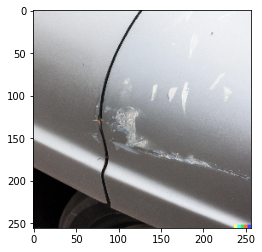

In [51]:
img_size = 256

img = load_img(file_list[0], target_size=(img_size, img_size, 3))
img = img_to_array(img) / 255
img_tensor = np.expand_dims(img, axis=0)
plt.imshow(img)

In [52]:
pred = model.predict(img_tensor)
pred, np.round(pred)

(array([[0.94243556]], dtype=float32), array([[1.]], dtype=float32))

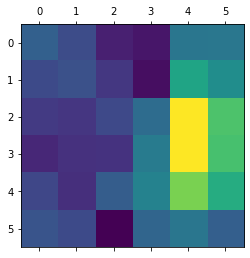

In [53]:
pred_output = model.output[:, 0]
last_conv_layer = model.get_layer('mixed10')
grads = K.gradients(pred_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

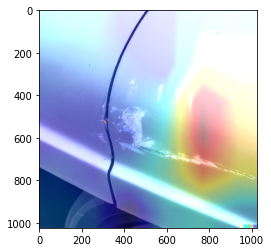

In [62]:
import cv2

img = cv2.imread(file_list[0])
temp = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
temp = np.uint8(255 * temp)
temp = cv2.applyColorMap(temp, cv2.COLORMAP_JET)
superimposed_img = np.clip((temp * 0.4 + img), 0, 255).astype(np.uint8)
plt.imshow(superimposed_img[:, :, ::-1])

[[0.55996454]] [[1.]]


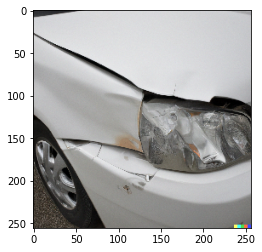

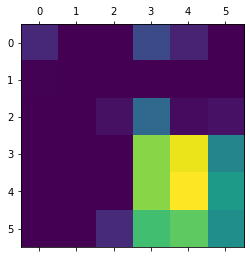

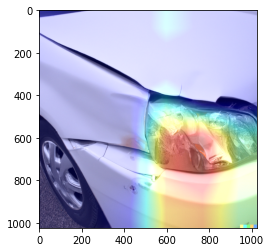

In [63]:
img_size = 256
idx = 1

img = load_img(file_list[idx], target_size=(img_size, img_size, 3))
img = img_to_array(img) / 255
img_tensor = np.expand_dims(img, axis=0)
plt.imshow(img)

pred = model.predict(img_tensor)
print(pred, np.round(pred))

pred_output = model.output[:, 0]
last_conv_layer = model.get_layer('mixed10')
grads = K.gradients(pred_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()


img = cv2.imread(file_list[idx])
temp = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
temp = np.uint8(255 * temp)
temp = cv2.applyColorMap(temp, cv2.COLORMAP_JET)
superimposed_img = np.clip((temp * 0.4 + img), 0, 255).astype(np.uint8)
plt.imshow(superimposed_img[:, :, ::-1])

[[0.39777467]] [[0.]]


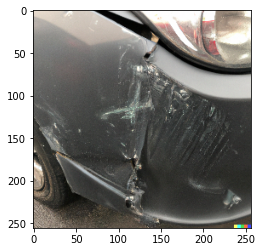

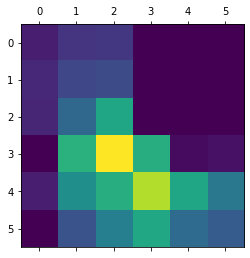

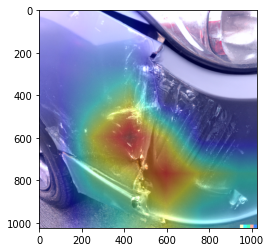

In [66]:
img_size = 256
idx = 2

img = load_img(file_list[idx], target_size=(img_size, img_size, 3))
img = img_to_array(img) / 255
img_tensor = np.expand_dims(img, axis=0)
plt.imshow(img)

pred = model.predict(img_tensor)
print(pred, np.round(pred))

pred_output = model.output[:, 0]
last_conv_layer = model.get_layer('mixed10')
grads = K.gradients(pred_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

img = cv2.imread(file_list[idx])
temp = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
temp = np.uint8(255 * temp)
temp = cv2.applyColorMap(temp, cv2.COLORMAP_JET)
superimposed_img = np.clip((temp * 0.4 + img), 0, 255).astype(np.uint8)
plt.imshow(superimposed_img[:, :, ::-1])

[[0.49854043]] [[0.]]


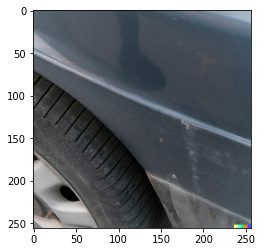

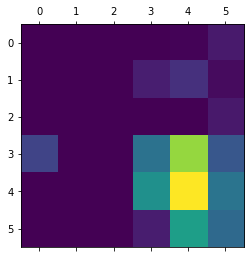

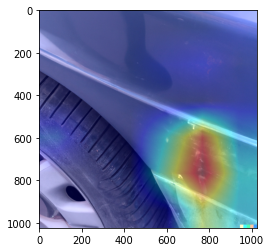

In [67]:
img_size = 256
idx = 3

img = load_img(file_list[idx], target_size=(img_size, img_size, 3))
img = img_to_array(img) / 255
img_tensor = np.expand_dims(img, axis=0)
plt.imshow(img)

pred = model.predict(img_tensor)
print(pred, np.round(pred))

pred_output = model.output[:, 0]
last_conv_layer = model.get_layer('mixed10')
grads = K.gradients(pred_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

img = cv2.imread(file_list[idx])
temp = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
temp = np.uint8(255 * temp)
temp = cv2.applyColorMap(temp, cv2.COLORMAP_JET)
superimposed_img = np.clip((temp * 0.4 + img), 0, 255).astype(np.uint8)
plt.imshow(superimposed_img[:, :, ::-1])

[[0.95300686]] [[1.]]


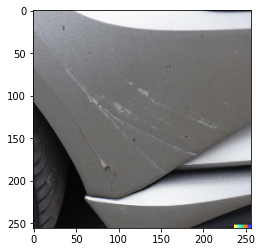

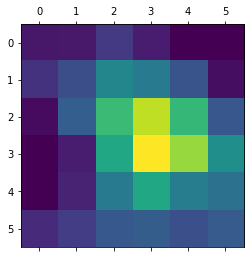

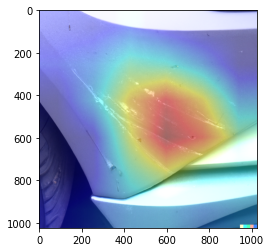

In [69]:
img_size = 256
idx = 4

img = load_img(file_list[idx], target_size=(img_size, img_size, 3))
img = img_to_array(img) / 255
img_tensor = np.expand_dims(img, axis=0)
plt.imshow(img)

pred = model.predict(img_tensor)
print(pred, np.round(pred))

pred_output = model.output[:, 0]
last_conv_layer = model.get_layer('mixed10')
grads = K.gradients(pred_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

img = cv2.imread(file_list[idx])
temp = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
temp = np.uint8(255 * temp)
temp = cv2.applyColorMap(temp, cv2.COLORMAP_JET)
superimposed_img = np.clip((temp * 0.4 + img), 0, 255).astype(np.uint8)
plt.imshow(superimposed_img[:, :, ::-1])